In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
FF = pd.read_csv(r"C:\Users\Vinnie\OneDrive\Desktop\updated_PitStopFinal.csv")

In [3]:
FF.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,constructorId,grid,position,fastestLapSpeed,FastestLapSeconds,FastestLapMilliseconds,engineType
0,1051,1.0,2.0,42.0,0.75,25.38,25381.0,131.0,1.0,1,227.63,85.1,85100.0,1.0
1,1052,1.0,1.0,13.0,0.77,24.84,24839.0,131.0,2.0,1,207.24,94.0,94000.0,1.0
2,1052,1.0,2.0,28.0,0.79,24.08,24076.0,131.0,2.0,1,207.24,94.0,94000.0,1.0
3,1053,1.0,1.0,28.0,0.66,32.11,32112.0,131.0,1.0,2,230.40,76.7,76700.0,1.0
4,1053,1.0,2.0,31.0,0.66,38.20,38198.0,131.0,1.0,2,230.40,76.7,76700.0,1.0


In [17]:
FF

,raceId,driverId,stop,lap,time,duration,milliseconds,constructorId,grid,position,fastestLapSpeed,FastestLapSeconds,FastestLapMilliseconds,engineType
0,1051,1.0,2.0,42.0,0.75,25.38,25381.0,131.0,1.0,1,227.63,85.1,85100.0,1.0
1,1052,1.0,1.0,13.0,0.77,24.84,24839.0,131.0,2.0,1,207.24,94.0,94000.0,1.0
2,1052,1.0,2.0,28.0,0.79,24.08,24076.0,131.0,2.0,1,207.24,94.0,94000.0,1.0
3,1053,1.0,1.0,28.0,0.66,32.11,32112.0,131.0,1.0,2,230.40,76.7,76700.0,1.0
4,1053,1.0,2.0,31.0,0.66,38.20,38198.0,131.0,1.0,2,230.40,76.7,76700.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1071,854.0,3.0,11.0,0.60,41.17,41173.0,210.0,18.0,18,210.22,73.8,73800.0,2.0
690,1071,854.0,4.0,29.0,0.61,25.60,25597.0,210.0,18.0,18,210.22,73.8,73800.0,2.0
691,1071,854.0,5.0,61.0,0.64,24.63,24627.0,210.0,18.0,18,210.22,73.8,73800.0,2.0
692,1073,854.0,1.0,10.0,0.72,22.12,22124.0,210.0,19.0,14,212.52,89.5,89500.0,2.0


In [6]:
scaler = StandardScaler()
scaler.fit(FF.drop('position', axis=1))
scaledVariables = scaler.transform(FF.drop('position',axis=1))
FFScaled = pd.DataFrame(scaledVariables, columns=FF.columns[:-1])

In [7]:
x = FFScaled
y = FF['position']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [24]:
print(confusion_matrix(y_test, pred))

[[2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 4 0 0 0]
 [0 2 1 2 1 0 2 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [1 1 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 3 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 5 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 1 1 1 0]
 [0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0]
 [1 2 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 2 0 0 0 0]
 [0 1 0 0 0 0 1 1 1 0 0 2 0 2 0 0 0 1 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0]
 [1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 1 0 1 2 0 0 3 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 2 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.20      0.29      0.24         7
           1       0.29      0.18      0.22        11
           2       0.18      0.25      0.21         8
           3       0.12      0.17      0.14         6
           4       0.20      0.12      0.15         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         4
           7       0.08      0.14      0.11         7
           8       0.14      0.25      0.18         4
           9       0.00      0.00      0.00         7
          10       0.25      0.25      0.25         4
          11       0.08      0.14      0.10         7
          12       0.25      0.12      0.17         8
          13       0.40      0.22      0.29         9
          14       0.00      0.00      0.00         6
          15       0.14      0.11      0.12         9
          16       0.00      0.00      0.00         9
          17       0.11    

In [13]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

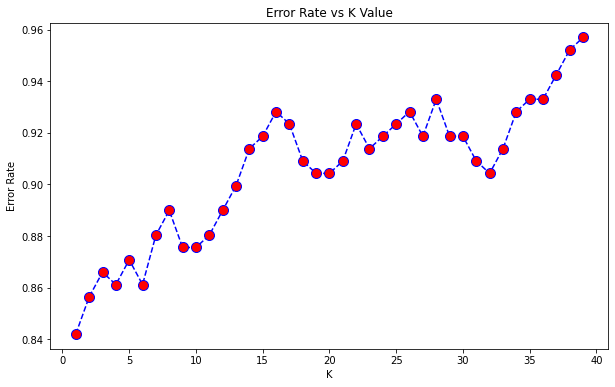

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)